## Employees evaluation for the Promotion in HR department
## The HR team stored data of promotion cycle last year, which consists of details of 
## all the employees in the company working last year and also if they got promoted 
## or not, but every time this process gets delayed due to so many details available 
## for each employee - it gets difficult to compare and decide.
## So this time HR team wants to utilize the stored data to make a model, that will 
## predict if a person is eligible for promotion or not.
## Need to come up with a model that will help the HR team to predict if a person is 
## eligible for promotion or not.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("employee_promotion.csv")
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78.0,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56.0,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79.0,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,NaN,0


In [3]:
df.head()


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


In [4]:
df.shape

(54808, 13)

In [5]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,52248.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.712238,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.521910,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


In [6]:
df.info

<bound method DataFrame.info of        employee_id         department     region         education gender  \
0            65438  Sales & Marketing   region_7  Master's & above      f   
1            65141         Operations  region_22        Bachelor's      m   
2             7513  Sales & Marketing  region_19        Bachelor's      m   
3             2542  Sales & Marketing  region_23        Bachelor's      m   
4            48945         Technology  region_26        Bachelor's      m   
...            ...                ...        ...               ...    ...   
54803         3030         Technology  region_14        Bachelor's      m   
54804        74592         Operations  region_27  Master's & above      f   
54805        13918          Analytics   region_1        Bachelor's      m   
54806        13614  Sales & Marketing   region_9               NaN      m   
54807        51526                 HR  region_22        Bachelor's      m   

      recruitment_channel  no_of_trainings 

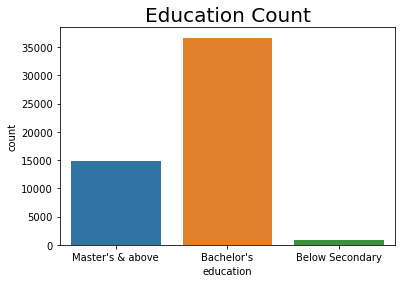

In [7]:
sns.countplot(df.education)
plt.title('Education Count',fontsize=20)
plt.show()


In [8]:
df.isnull().sum()


employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

In [9]:
df.previous_year_rating.fillna(df['previous_year_rating'].median(), inplace = True)
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78.0,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56.0,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79.0,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,NaN,0


In [10]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

In [11]:
df.avg_training_score.fillna(df['avg_training_score'].median(), inplace = True)
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78.0,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56.0,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79.0,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,60.0,0


In [12]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
awards_won                 0
avg_training_score         0
is_promoted                0
dtype: int64

In [13]:
df.education.fillna("Bachelor's", inplace = True)
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78.0,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56.0,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79.0,0
54806,13614,Sales & Marketing,region_9,Bachelor's,m,sourcing,1,29,1.0,2,0,60.0,0


In [14]:
df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
is_promoted             0
dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
cols=['education']
df[cols] = df[cols].apply(LabelEncoder().fit_transform)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x= df.drop("region", axis=1)
x

,employee_id,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,2,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,0,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,0,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,0,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,0,m,other,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,0,m,sourcing,1,48,3.0,17,0,78.0,0
54804,74592,Operations,2,f,other,1,37,2.0,6,0,56.0,0
54805,13918,Analytics,0,m,other,1,27,5.0,3,0,79.0,0
54806,13614,Sales & Marketing,0,m,sourcing,1,29,1.0,2,0,60.0,0


In [19]:
x=x.drop('is_promoted',axis=1)
x

,employee_id,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score
0,65438,Sales & Marketing,2,f,sourcing,1,35,5.0,8,0,49.0
1,65141,Operations,0,m,other,1,30,5.0,4,0,60.0
2,7513,Sales & Marketing,0,m,sourcing,1,34,3.0,7,0,50.0
3,2542,Sales & Marketing,0,m,other,2,39,1.0,10,0,50.0
4,48945,Technology,0,m,other,1,45,3.0,2,0,73.0
...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,0,m,sourcing,1,48,3.0,17,0,78.0
54804,74592,Operations,2,f,other,1,37,2.0,6,0,56.0
54805,13918,Analytics,0,m,other,1,27,5.0,3,0,79.0
54806,13614,Sales & Marketing,0,m,sourcing,1,29,1.0,2,0,60.0


In [20]:
x=x.drop('gender',axis=1)
x

,employee_id,department,education,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score
0,65438,Sales & Marketing,2,sourcing,1,35,5.0,8,0,49.0
1,65141,Operations,0,other,1,30,5.0,4,0,60.0
2,7513,Sales & Marketing,0,sourcing,1,34,3.0,7,0,50.0
3,2542,Sales & Marketing,0,other,2,39,1.0,10,0,50.0
4,48945,Technology,0,other,1,45,3.0,2,0,73.0
...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,0,sourcing,1,48,3.0,17,0,78.0
54804,74592,Operations,2,other,1,37,2.0,6,0,56.0
54805,13918,Analytics,0,other,1,27,5.0,3,0,79.0
54806,13614,Sales & Marketing,0,sourcing,1,29,1.0,2,0,60.0


In [21]:
x=x.drop('department',axis=1)
x

,employee_id,education,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score
0,65438,2,sourcing,1,35,5.0,8,0,49.0
1,65141,0,other,1,30,5.0,4,0,60.0
2,7513,0,sourcing,1,34,3.0,7,0,50.0
3,2542,0,other,2,39,1.0,10,0,50.0
4,48945,0,other,1,45,3.0,2,0,73.0
...,...,...,...,...,...,...,...,...,...
54803,3030,0,sourcing,1,48,3.0,17,0,78.0
54804,74592,2,other,1,37,2.0,6,0,56.0
54805,13918,0,other,1,27,5.0,3,0,79.0
54806,13614,0,sourcing,1,29,1.0,2,0,60.0


In [22]:
x=x.drop('recruitment_channel',axis=1)
x

,employee_id,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score
0,65438,2,1,35,5.0,8,0,49.0
1,65141,0,1,30,5.0,4,0,60.0
2,7513,0,1,34,3.0,7,0,50.0
3,2542,0,2,39,1.0,10,0,50.0
4,48945,0,1,45,3.0,2,0,73.0
...,...,...,...,...,...,...,...,...
54803,3030,0,1,48,3.0,17,0,78.0
54804,74592,2,1,37,2.0,6,0,56.0
54805,13918,0,1,27,5.0,3,0,79.0
54806,13614,0,1,29,1.0,2,0,60.0


In [23]:
y=df['is_promoted']
y

0        0
1        0
2        0
3        0
4        0
        ..
54803    0
54804    0
54805    0
54806    0
54807    0
Name: is_promoted, Length: 54808, dtype: int64

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
alg = LogisticRegression()
alg.fit(x_train, y_train)


LogisticRegression()

In [27]:
y_pred=alg.predict(x_test)

In [28]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))


0.9157787184352649


In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [30]:
def train(model):
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    print(f'Confusion Matrix:\n{confusion_matrix(y_test,pred)}')
    print(f'Classification Report:\n{classification_report(y_test,pred)}')
    print(f'Accuracy Score:\n{accuracy_score(y_test,pred)*100}')

In [31]:
from sklearn.ensemble import RandomForestClassifier
rtc=RandomForestClassifier()
train(rtc)

Confusion Matrix:
[[12446   102]
 [  982   172]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     12548
           1       0.63      0.15      0.24      1154

    accuracy                           0.92     13702
   macro avg       0.78      0.57      0.60     13702
weighted avg       0.90      0.92      0.90     13702

Accuracy Score:
92.08874616844255


In [32]:
from sklearn.ensemble import BaggingClassifier
bc=BaggingClassifier()
train(bc)

Confusion Matrix:
[[12392   156]
 [  973   181]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     12548
           1       0.54      0.16      0.24      1154

    accuracy                           0.92     13702
   macro avg       0.73      0.57      0.60     13702
weighted avg       0.89      0.92      0.90     13702

Accuracy Score:
91.76032695956795


In [33]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()
train(abc)

Confusion Matrix:
[[12512    36]
 [  999   155]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     12548
           1       0.81      0.13      0.23      1154

    accuracy                           0.92     13702
   macro avg       0.87      0.57      0.60     13702
weighted avg       0.92      0.92      0.90     13702

Accuracy Score:
92.44635819588382


In [34]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
train(gbc)

Confusion Matrix:
[[12504    44]
 [  993   161]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     12548
           1       0.79      0.14      0.24      1154

    accuracy                           0.92     13702
   macro avg       0.86      0.57      0.60     13702
weighted avg       0.91      0.92      0.90     13702

Accuracy Score:
92.4317617866005


In [35]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
train(nb)

Confusion Matrix:
[[12548     0]
 [ 1134    20]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     12548
           1       1.00      0.02      0.03      1154

    accuracy                           0.92     13702
   macro avg       0.96      0.51      0.50     13702
weighted avg       0.92      0.92      0.88     13702

Accuracy Score:
91.72383593635965


In [37]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
train(dtc)

Confusion Matrix:
[[11506  1042]
 [  862   292]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92     12548
           1       0.22      0.25      0.23      1154

    accuracy                           0.86     13702
   macro avg       0.57      0.58      0.58     13702
weighted avg       0.87      0.86      0.87     13702

Accuracy Score:
86.10421836228288
